In [24]:
#import library
import pandas as pd

In [25]:
netflix = pd.read_csv("netflix_cleaned.csv")
netflix.head(2)

,Unnamed: 0,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added,listed_in_1,listed_in_2,listed_in_3
0,0,Movie,Dick Johnson Is Dead,Kirsten Johnson,['Data not available'],United States,2021-09-25,2020,PG-13,90 min,['Documentaries'],"As her father nears the end of his life, filmm...",9,September,2021,Documentaries,0,0
1,1,TV Show,Blood & Water,Data not available,"['Ama Qamata', 'Khosi Ngema', 'Gail Mabalane',...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"['International TV Shows', 'TV Dramas', 'TV My...","After crossing paths at a party, a Cape Town t...",9,September,2021,International TV Shows,TV Dramas,TV Mysteries


# NETFLIX CONTENTS INFO

In [26]:
netflix_wordcloud = netflix[['title', 'description', 'listed_in_1']]
netflix_wordcloud.head(3)

,title,description,listed_in_1
0,Dick Johnson Is Dead,"As her father nears the end of his life, filmm...",Documentaries
1,Blood & Water,"After crossing paths at a party, a Cape Town t...",International TV Shows
2,Ganglands,To protect his family from a powerful drug lor...,Crime TV Shows


In [27]:
text_title = str(list(netflix_wordcloud['title'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')
text_description = str(list(netflix_wordcloud['description'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')
text_genre = str(list(netflix_wordcloud['listed_in_1'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')


In [28]:
text_title_path = '../Dashboard/Components/data/text_title.txt'
text_description_path = '../Dashboard/Components/data/text_description.txt'
text_genre_path = '../Dashboard/Components/data/text_genre.txt'

with open(text_title_path, "w", encoding="utf-8") as f:
    f.write(text_title)
    f.close()
with open(text_description_path, "w", encoding="utf-8") as f:
    f.write(text_description)
    f.close()
with open(text_genre_path, "w", encoding="utf-8") as f:
    f.write(text_genre)
    f.close()

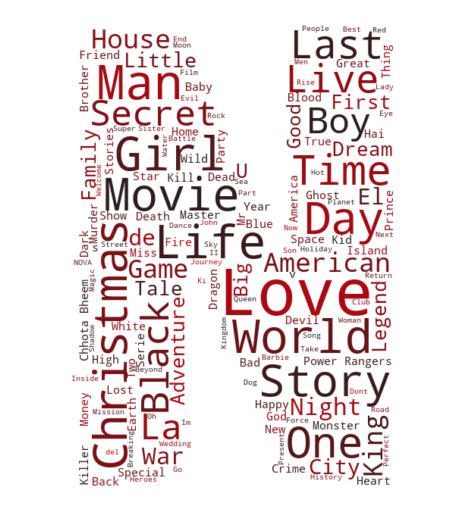

In [29]:
from wordcloud import WordCloud
import numpy as np
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt

# Custom colour map based on Netflix palette
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710'])

text = text_title

mask = np.array(Image.open('../Dashboard/Components/data/netflix.png'))

wordcloud = WordCloud(background_color = 'white', width = 500,  height = 200, colormap=cmap, max_words = 150, mask = mask).generate(text)

plt.figure(figsize=(5,5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.savefig('../Dashboard/Components/data/netflix_title.png')
plt.show()
